In [4]:
from GeneticAl-Optimization_Utils import * 

### TAGUCHIAN OA

In [2]:
#Given Taguchian_OA 
Taguchian_OA = [[0,0,0,0],
                [0,1,1,1],
                [0,2,2,2],
                [1,0,1,2],
                [1,1,2,0],
                [1,2,0,1],
                [2,0,2,1],
                [2,1,0,2],
                [2,2,1,0]]

#Option of 4 given factors
size_opt = [10,50,100]
time_opt = [20,100,200]
ratio_opt = [0.5,0.7,0.9]
prob_opt = [0.2,0.5,0.8]

#Optimality gap calculater for 5 different trials (outer array) and 4 different factors with 3 options each.
opt_gap_main_list = []
for i in range(0,5):
    opt_gap_list = []
    c = np.array([random.randint(0,4) for i in range(10)])
    A = np.array([[random.randint(0,4) for i in range(10)],[random.randint(0,4) for i in range(10)]])
    b = [random.randint(13,15) for i in range(2)]
    optimal_value, optimal_solution = optimal_knapsack_solver(A,b,c)
    for z in Taguchian_OA:
        sol, score = GIPSolver(A,b,c,size_opt[z[0]],time_opt[z[1]],ratio_opt[z[2]],prob_opt[z[3]],3,4)
        optimality_gap = round(((optimal_value-score) / optimal_value)*100,0)
        opt_gap_list.append(optimality_gap)
    print(opt_gap_list)
    opt_gap_main_list.append(opt_gap_list)

[25.0, 12.0, 50.0, 44.0, 88.0, 31.0, 88.0, 31.0, 44.0]
[39.0, 39.0, 83.0, 83.0, 72.0, 39.0, 67.0, 39.0, 50.0]
[15.0, 45.0, 70.0, 70.0, 80.0, 25.0, 65.0, 25.0, 50.0]
[39.0, 52.0, 39.0, 61.0, 96.0, 39.0, 87.0, 39.0, 78.0]
[29.0, 43.0, 33.0, 57.0, 81.0, 43.0, 81.0, 43.0, 43.0]


In [6]:
#Creates a summary dataframe with all prior info and calculates SNR.
import pandas as pd
trials = ['Trial-1','Trial-2','Trial-3','Trial-4','Trial-5']
Taguchian_df  = pd.DataFrame(np.transpose(opt_gap_main_list), index= [np.array(i)for i in np.transpose(Taguchian_OA)], columns = trials )
Taguchian_df['SNR'] = [round(-10*(np.log10(sum([i**2 for i in j]) / 5))) for j in np.transpose(opt_gap_main_list)]
Taguchian_df.reset_index(inplace = True)

Taguchian_df.rename({'level_0': 'Size', 'level_1': 'Time','level_2': 'Ratio','level_3': 'Prob'},axis = 1,inplace = True)
Taguchian_df

,Size,Time,Ratio,Prob,Trial-1,Trial-2,Trial-3,Trial-4,Trial-5,SNR
0,0,0,0,0,40.0,11.0,33.0,29.0,15.0,-29.0
1,0,1,1,1,45.0,61.0,67.0,76.0,50.0,-36.0
2,0,2,2,2,50.0,67.0,87.0,59.0,65.0,-36.0
3,1,0,1,2,65.0,67.0,73.0,65.0,85.0,-37.0
4,1,1,2,0,80.0,78.0,87.0,76.0,80.0,-38.0
5,1,2,0,1,50.0,17.0,40.0,29.0,15.0,-30.0
6,2,0,2,1,75.0,72.0,87.0,82.0,85.0,-38.0
7,2,1,0,2,50.0,17.0,40.0,29.0,15.0,-30.0
8,2,2,1,0,60.0,50.0,87.0,76.0,65.0,-37.0


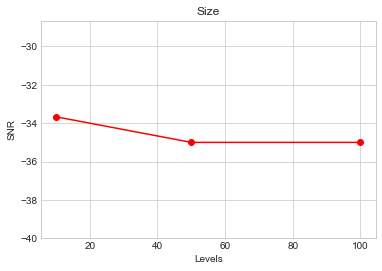

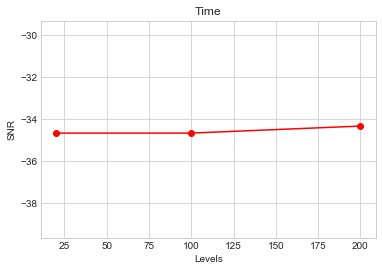

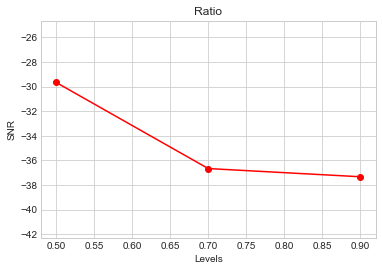

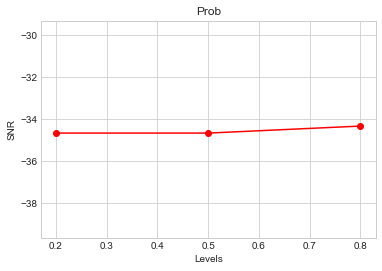

In [7]:
#Finds average SNR value for each level of every factor.
optimum_factor_list = []
for i in range(0,4):
    level_list = []
    for j in range(0,3):
        level_list.append(Taguchian_df[Taguchian_df.iloc[:,i] == j]['SNR'].mean())
    optimum_factor_list.append(level_list)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

factor_list = {'Size' : size_opt, 'Time':time_opt,'Ratio':ratio_opt, 'Prob':prob_opt}


num = 0
for keys, values in factor_list.items():
    fig = plt.figure()
    ax = plt.axes()
    x = optimum_factor_list[num]
    ax.plot(values,x,color = 'red',marker = 'o')
    plt.ylim(min(optimum_factor_list[num])-5, max(optimum_factor_list[num])+5)
    num+=1
    
    plt.title(keys)
    plt.xlabel("Levels")
    plt.ylabel("SNR")

In [8]:
#Finds maximum value of each factor and appends their index for next step
choosen_ones = [i.index(max(i)) for i in optimum_factor_list]    


#Use prior index numbers to implement most robust design
sol, score = GIPSolver(A,b,c,size_opt[choosen_ones[0]],
                             time_opt[choosen_ones[1]],
                             ratio_opt[choosen_ones[2]],
                             prob_opt[choosen_ones[3]],3,4)

optimality_gap = round(((optimal_value-score) / optimal_value)*100,0)

print('Robust parameter set:')
print('Size Time Ratio Prob')
print(size_opt[choosen_ones[0]],time_opt[choosen_ones[1]],ratio_opt[choosen_ones[2]],prob_opt[choosen_ones[3]])

print('Optimality Gap is:')
print(optimality_gap)

Robust parameter set:
Size Time Ratio Prob
10 200 0.5 0.8
Optimality Gap is:
15.0
